## 9.1 A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

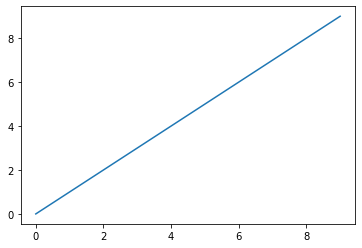

In [5]:
plt.plot(data)

### Figures and Subplots

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

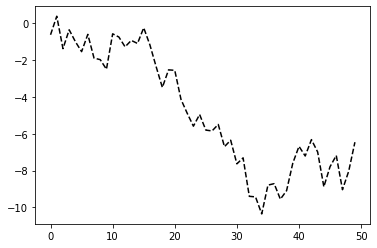

In [45]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [48]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.close('all')

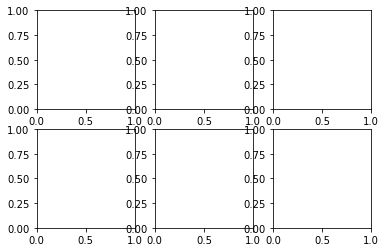

In [13]:
fig, axes = plt.subplots(2, 3)

In [17]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

#### Adjusting the spacing around subplots

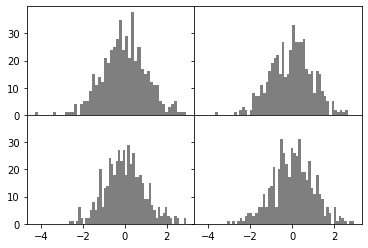

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [22]:
from numpy.random import randn

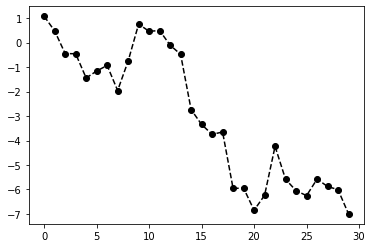

In [23]:
plt.plot(randn(30).cumsum(), 'ko--')

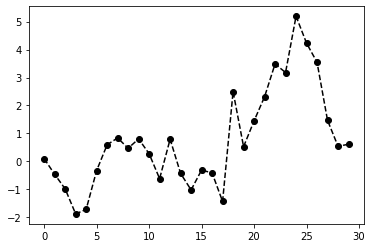

In [26]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [27]:
data = np.random.randn(30).cumsum()

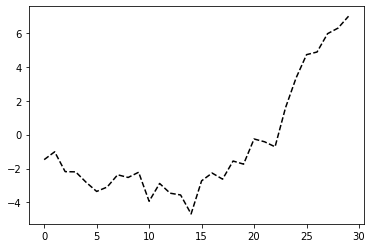

In [28]:
plt.plot(data, 'k--', label='Default')

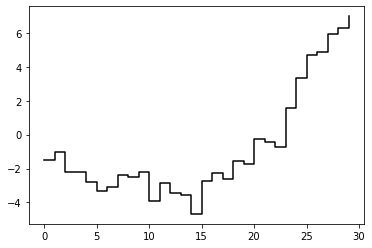

In [29]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


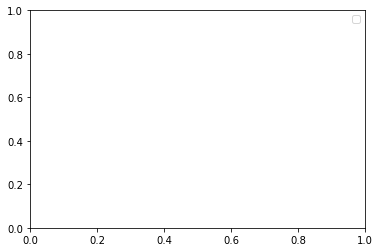

In [30]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, aixs labels, ticks, and ticklabels

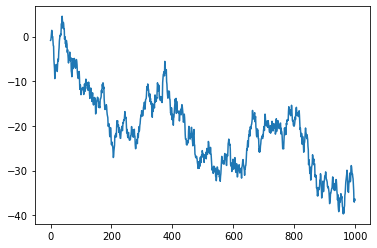

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [40]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [41]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

#### Adding legends

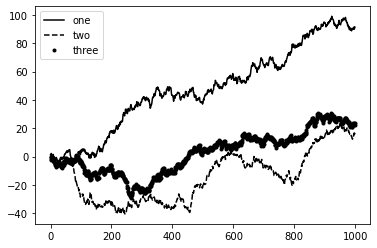

In [44]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [50]:
# ax.text(x, y, 'Hello world!', family = "monospace", fontsize=10)

NameError: name 'x' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

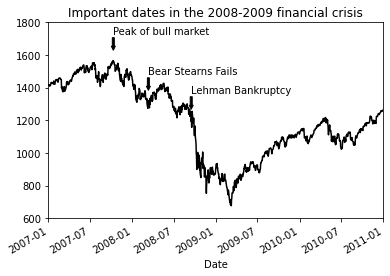

In [3]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    

## Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

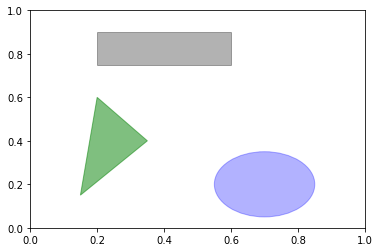

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [7]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [8]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [11]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib configuration

In [12]:
plt.rc('figure', figsize=(10, 10))

## 9.2 Plotting with pandas as seaborn

### Line Plots

In [18]:
import seaborn as sns
import numpy as np

In [19]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<AxesSubplot:>

/Users/seunghoonyang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


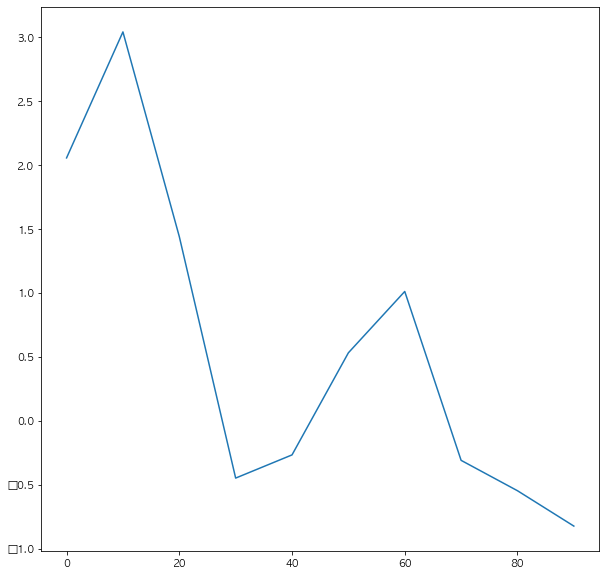

In [20]:
s.plot()

In [28]:
from matplotlib import rc
plt.rcParams['font.family'] = 'AppleGothic'
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

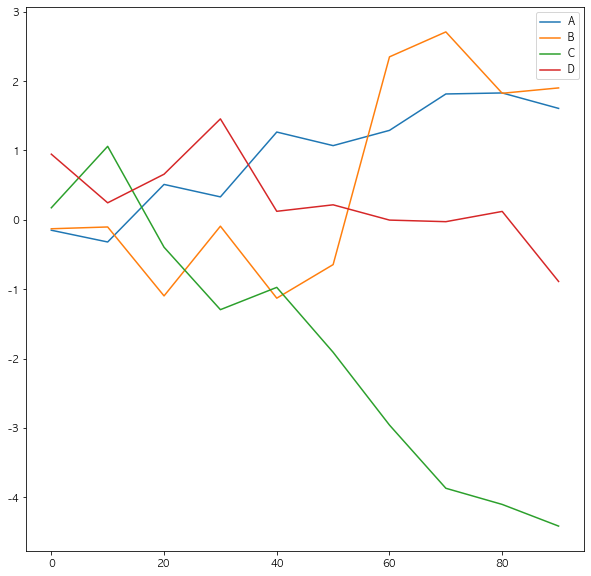

In [29]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<AxesSubplot:>

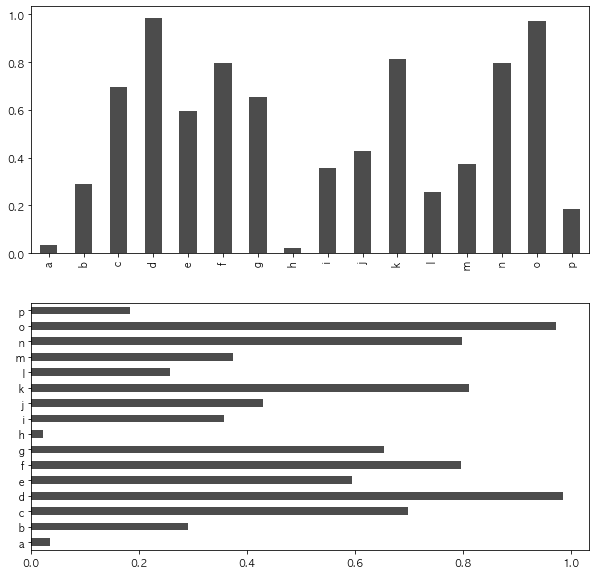

In [31]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [32]:
np.random.seed(12348)

In [33]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<AxesSubplot:>

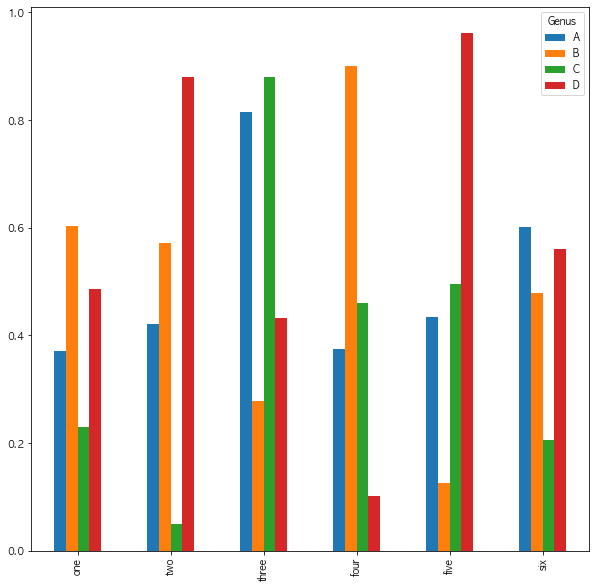

In [34]:
df.plot.bar()

<AxesSubplot:>

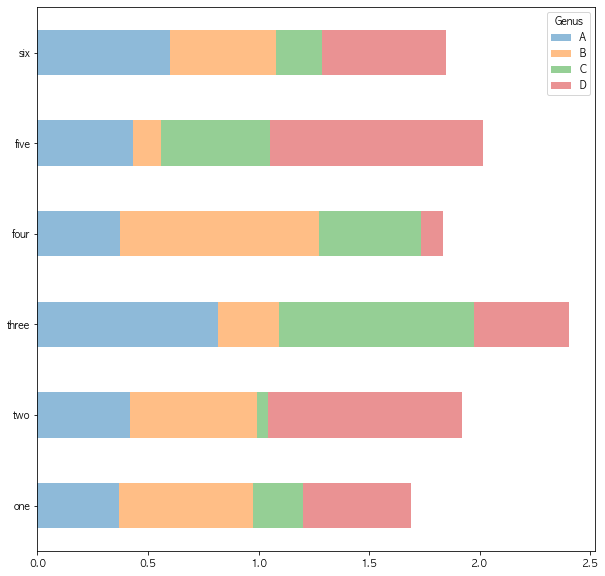

In [35]:
df.plot.barh(stacked=True, alpha=0.5)

In [37]:
tips = pd.read_csv('examples/tips.csv')

In [38]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [39]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [40]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [41]:
party_counts = party_counts.loc[:, 2:5]

In [42]:
party_pct = party_counts.div(party_counts.sum(1), axis=0)

In [43]:
party_pct

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [44]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [45]:
import seaborn as sns

In [46]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [47]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

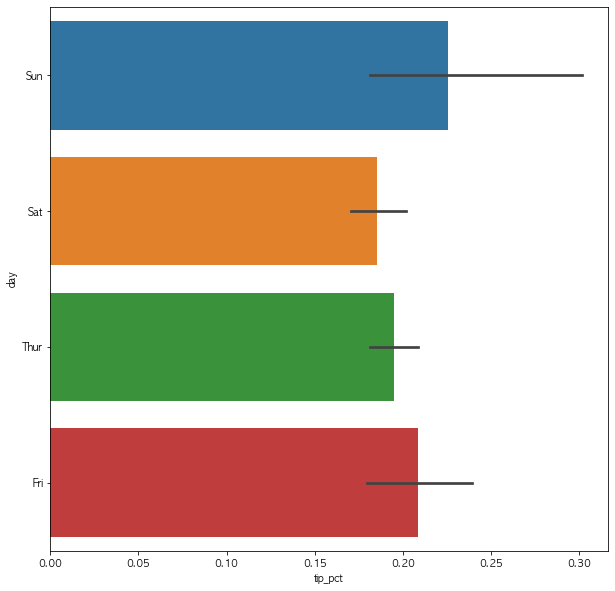

In [48]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

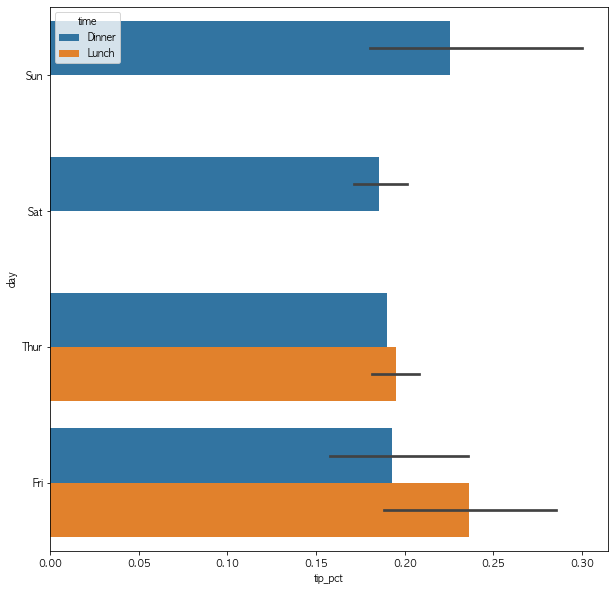

In [49]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [50]:
sns.set(style='whitegrid')

### Histograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

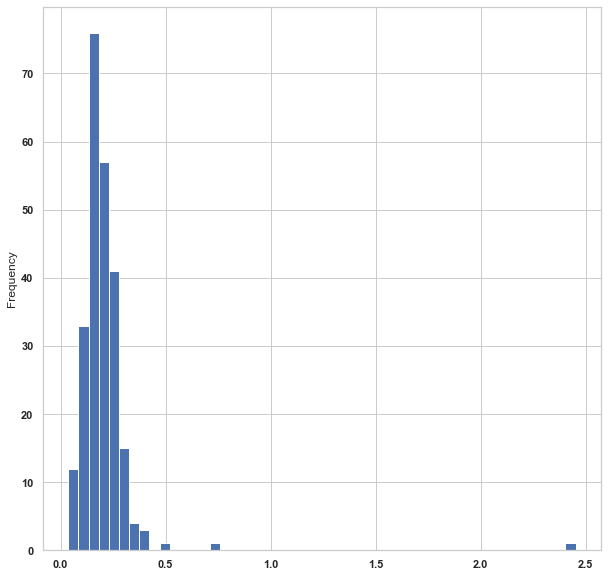

In [51]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

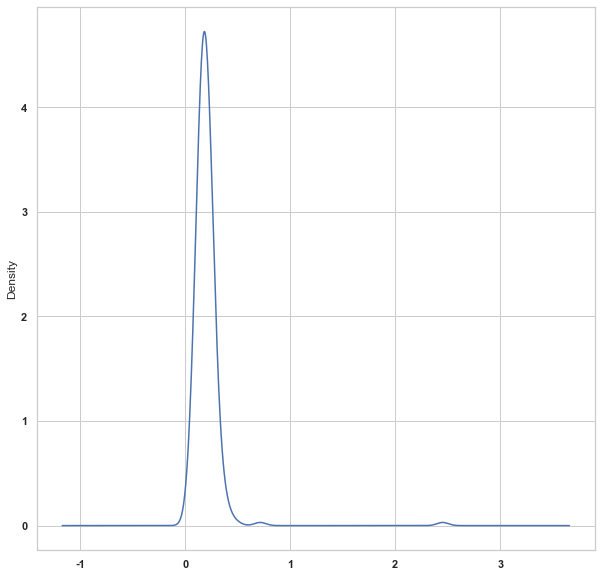

In [52]:
tips['tip_pct'].plot.density()

In [53]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

<AxesSubplot:ylabel='Count'>

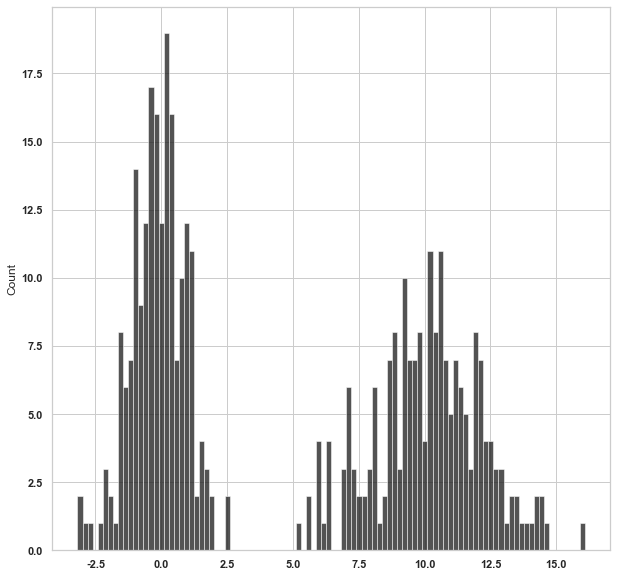

In [55]:
sns.histplot(values, bins=100, color='k')

### Scatter or Point Plots

In [57]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [58]:
trans_data = np.log(data).diff().dropna()

In [59]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [60]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

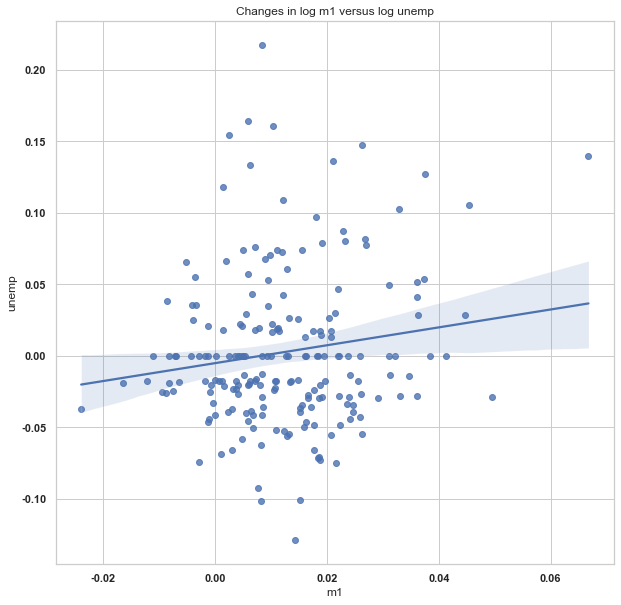

In [63]:
sns.regplot(x='m1', y='unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

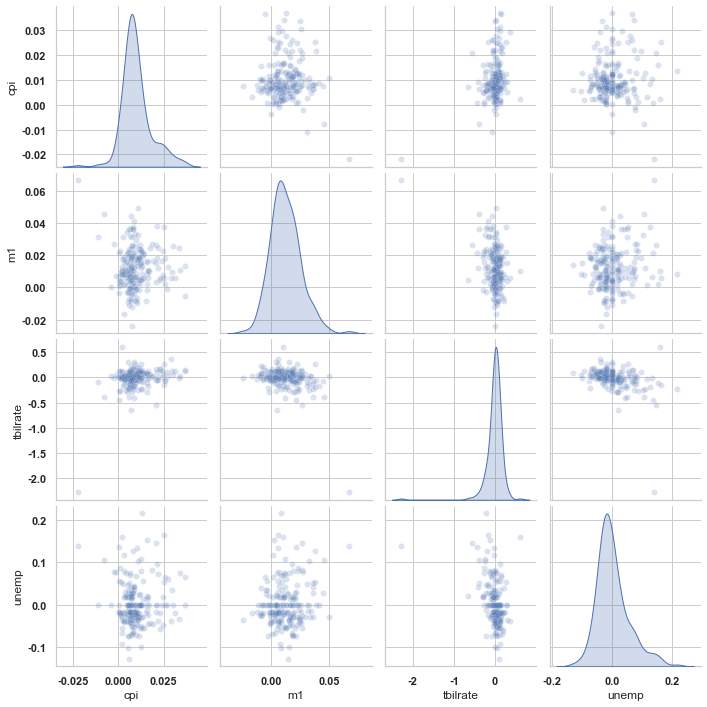

In [64]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

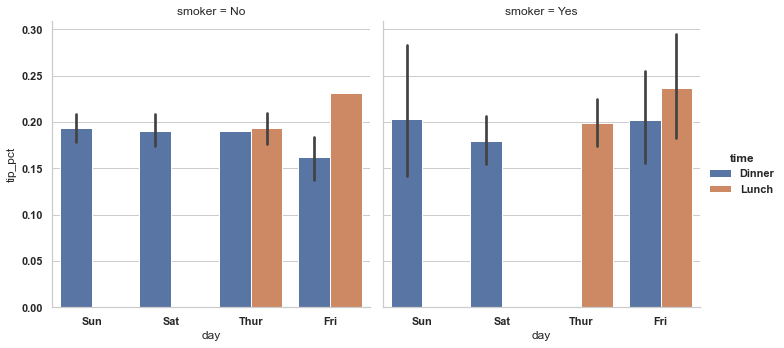

In [66]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct <1])

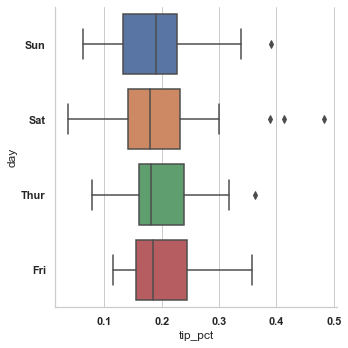

In [67]:
sns.catplot(x='tip_pct', y='day', kind='box',
            data=tips[tips.tip_pct < 0.5])